USING NLTK (NATURAL LANGUAGE TOOLKIT) FOR LEXICAL SIMPLIFICATION

In [2]:
!pip install nltk # install the nltk module

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.1 MB/s eta 0:00:00a 0:00:01m


In [4]:
# Download the 'punkt_tab' resource, a tokenizer for sentence splitting in various languages
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
LEXICAL SIMPLIFICATION AND PICTOGRAM VISUALIZATION FOR TEST USING WordNet AND ARASAAC API

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Package words is already up-to-date!


Original text: I love to play football
Simplified text: I love to play football
Pictogram ID for 'I': 6632


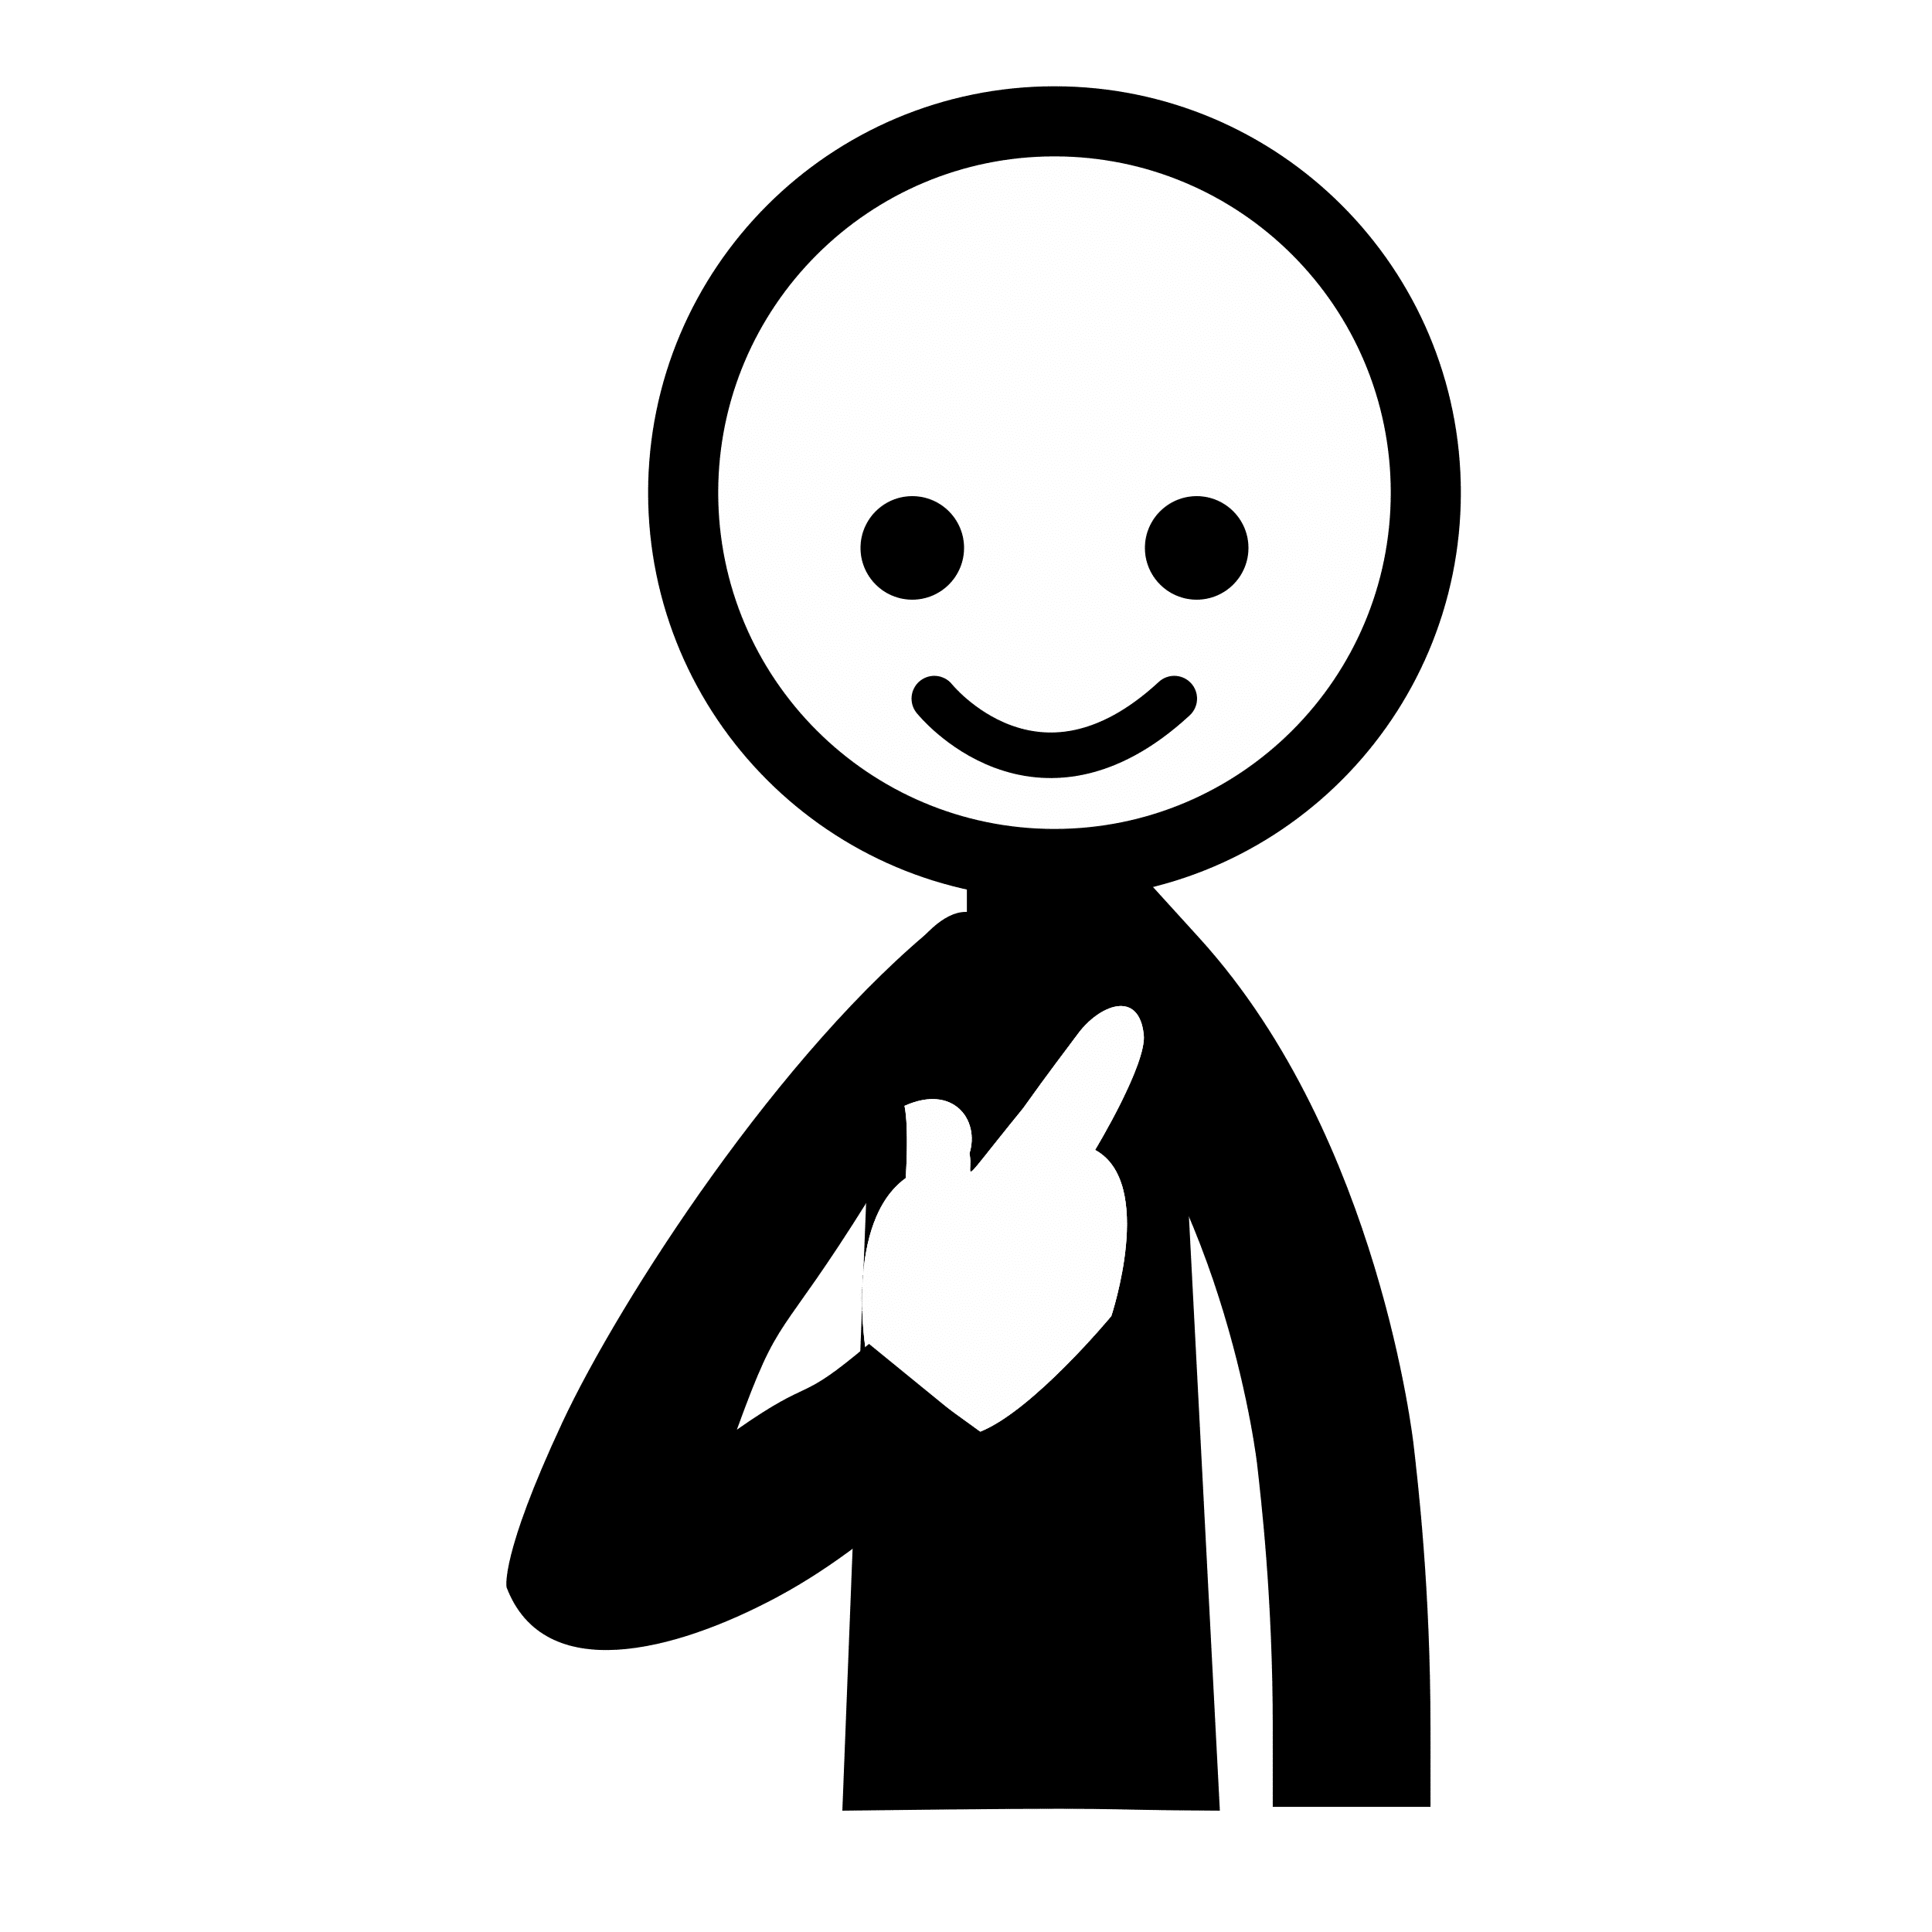

Pictogram ID for 'love': 37721


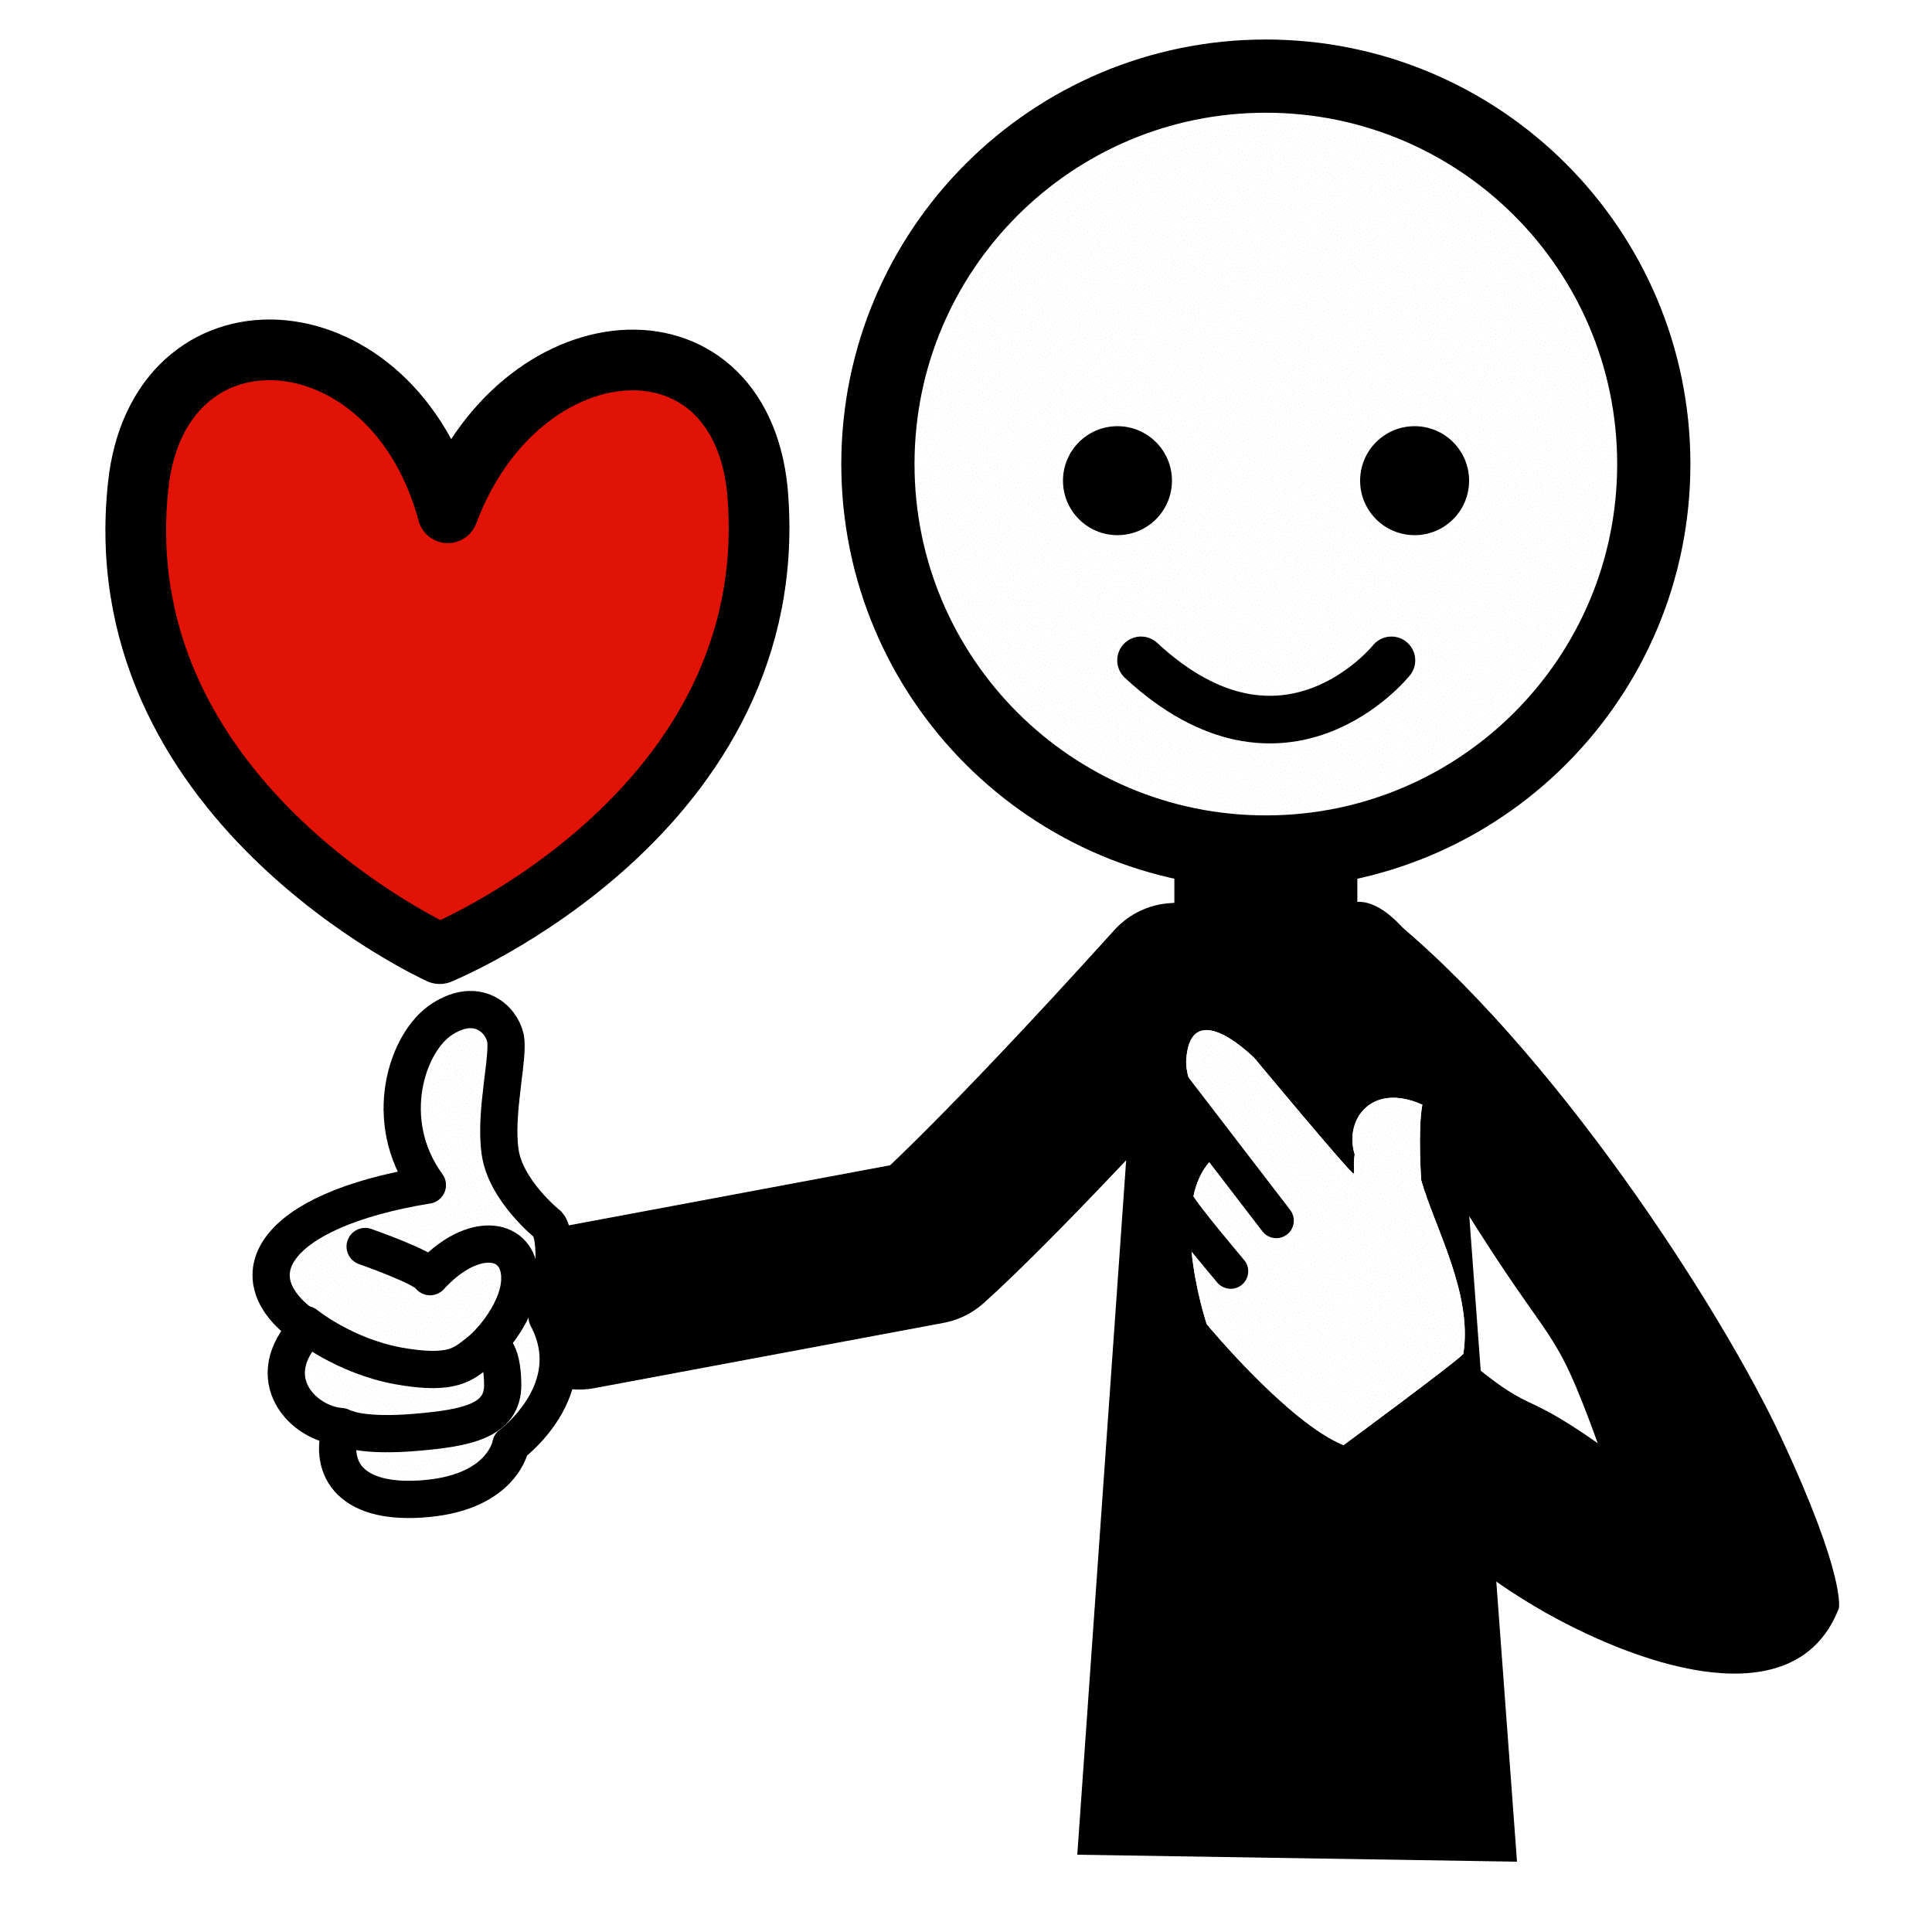

Pictogram ID for 'to': 7041


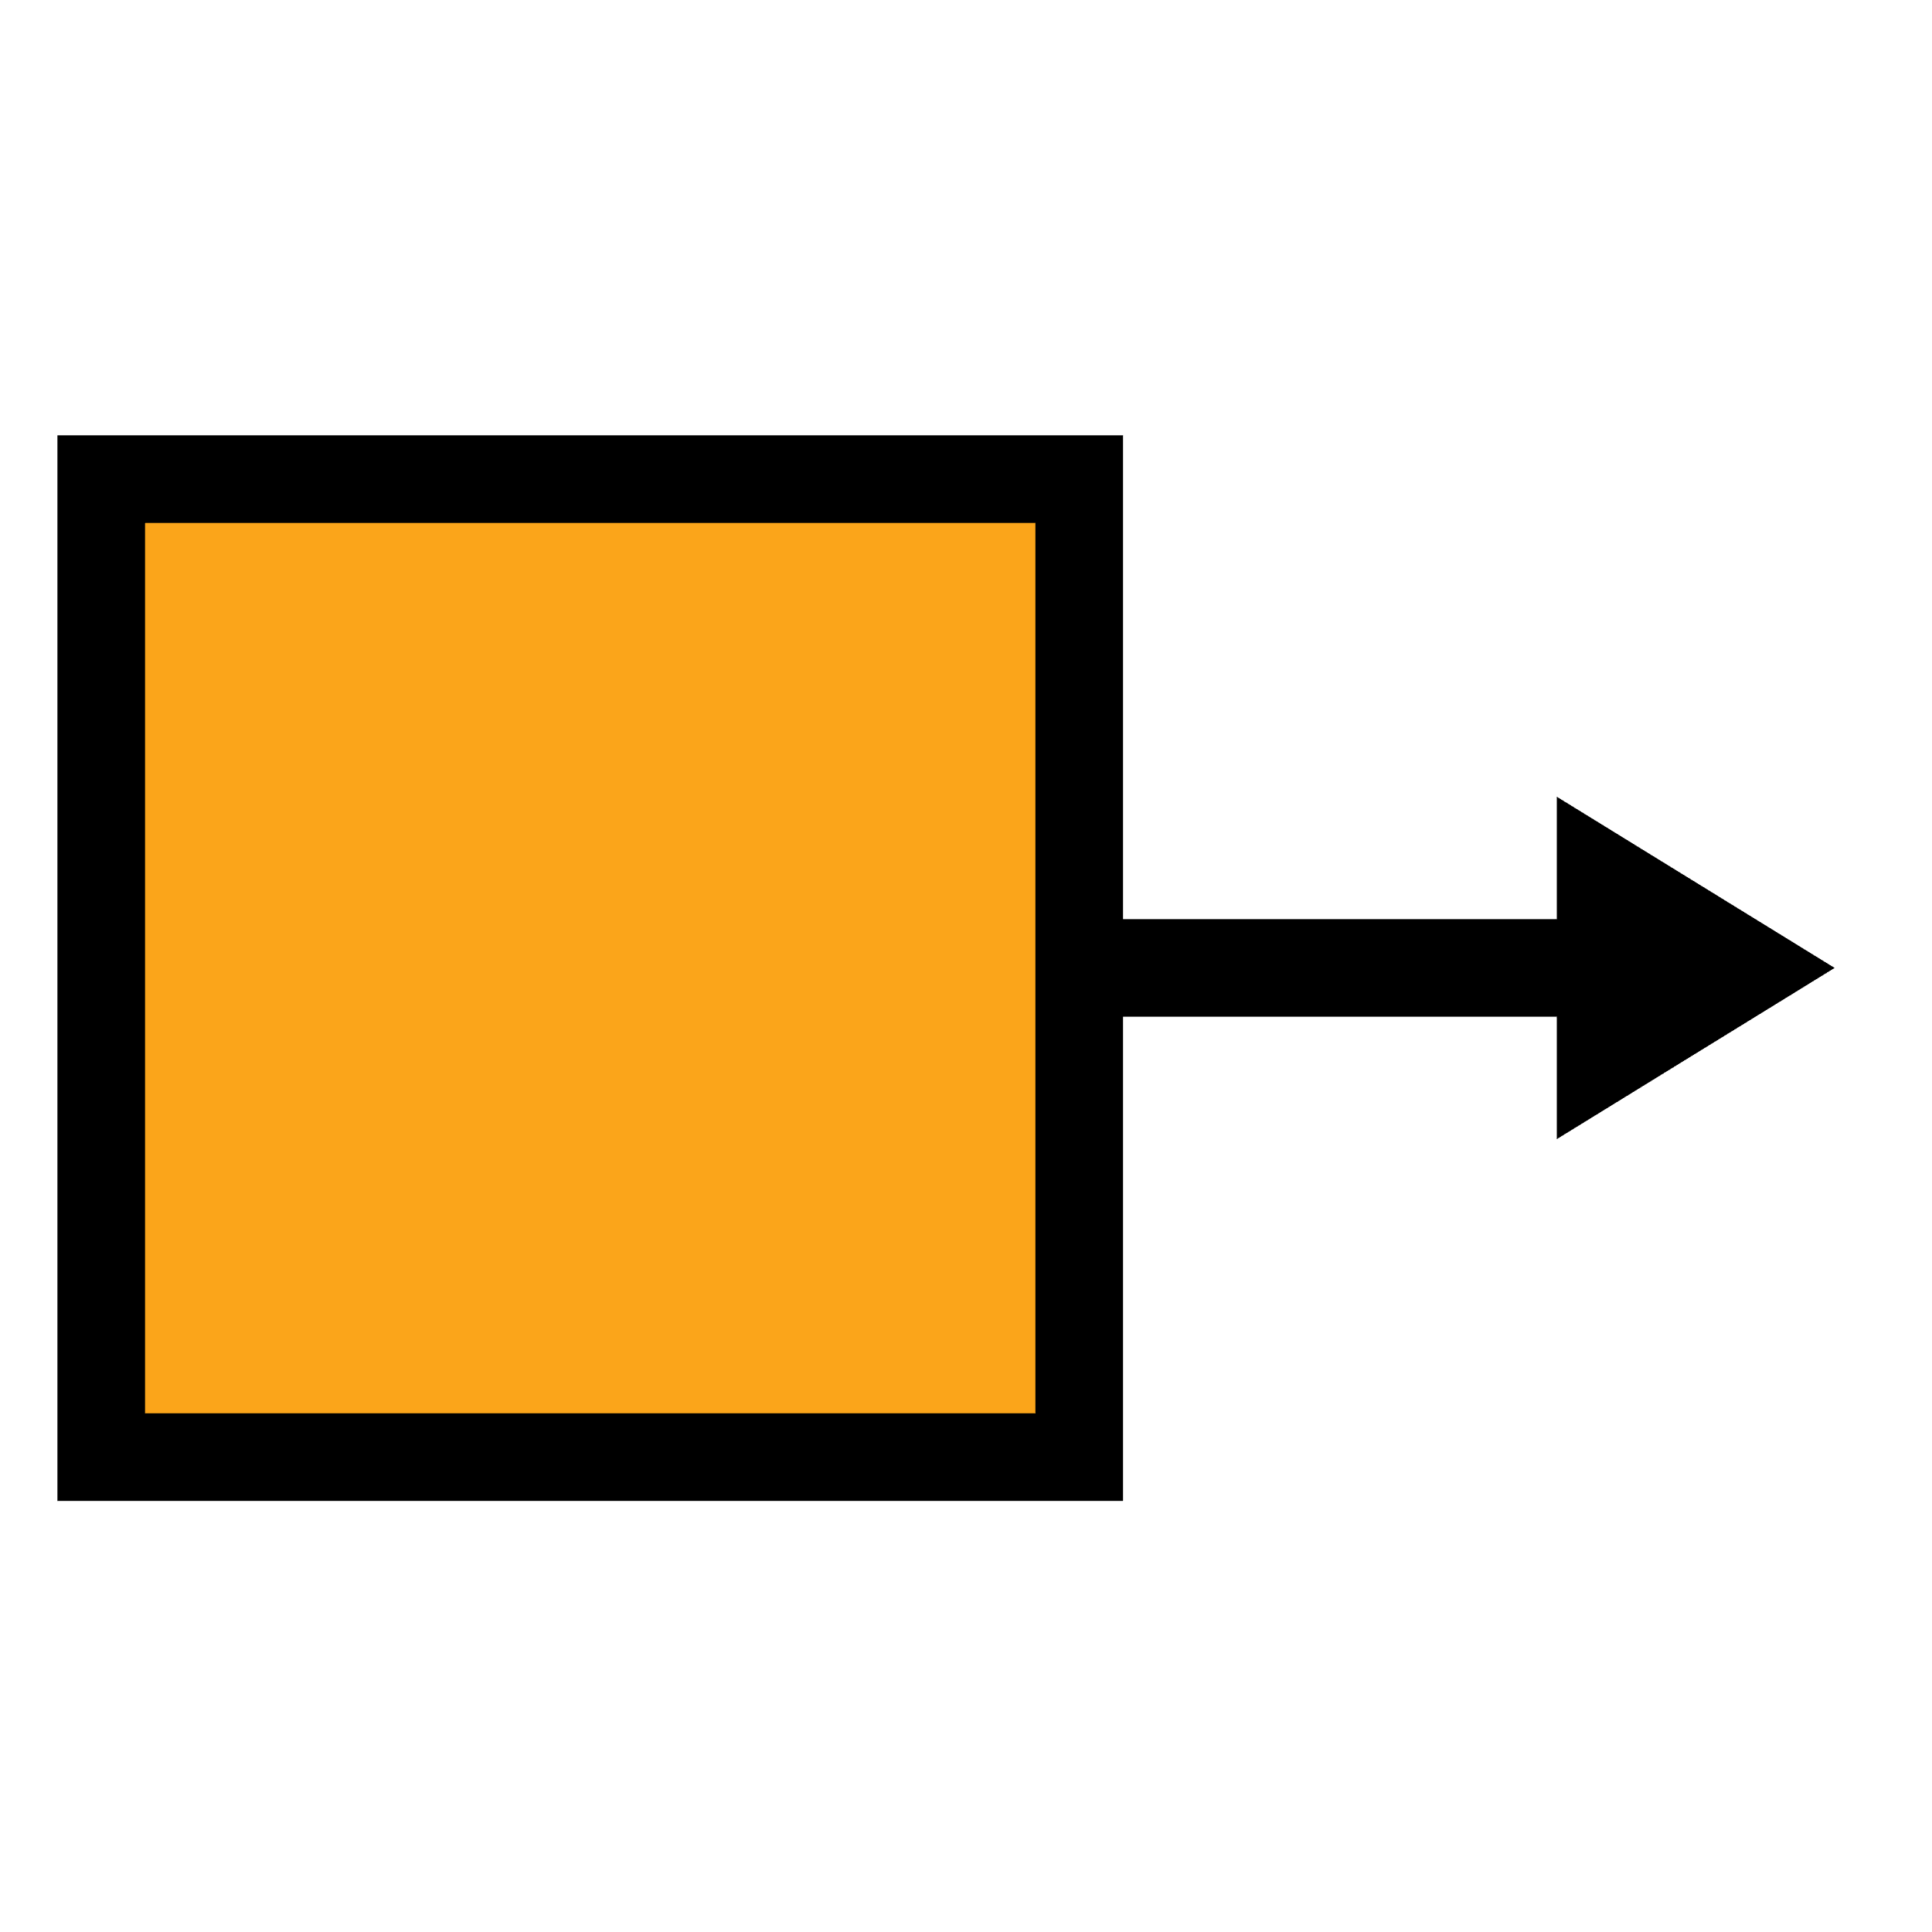

Pictogram ID for 'play': 23392


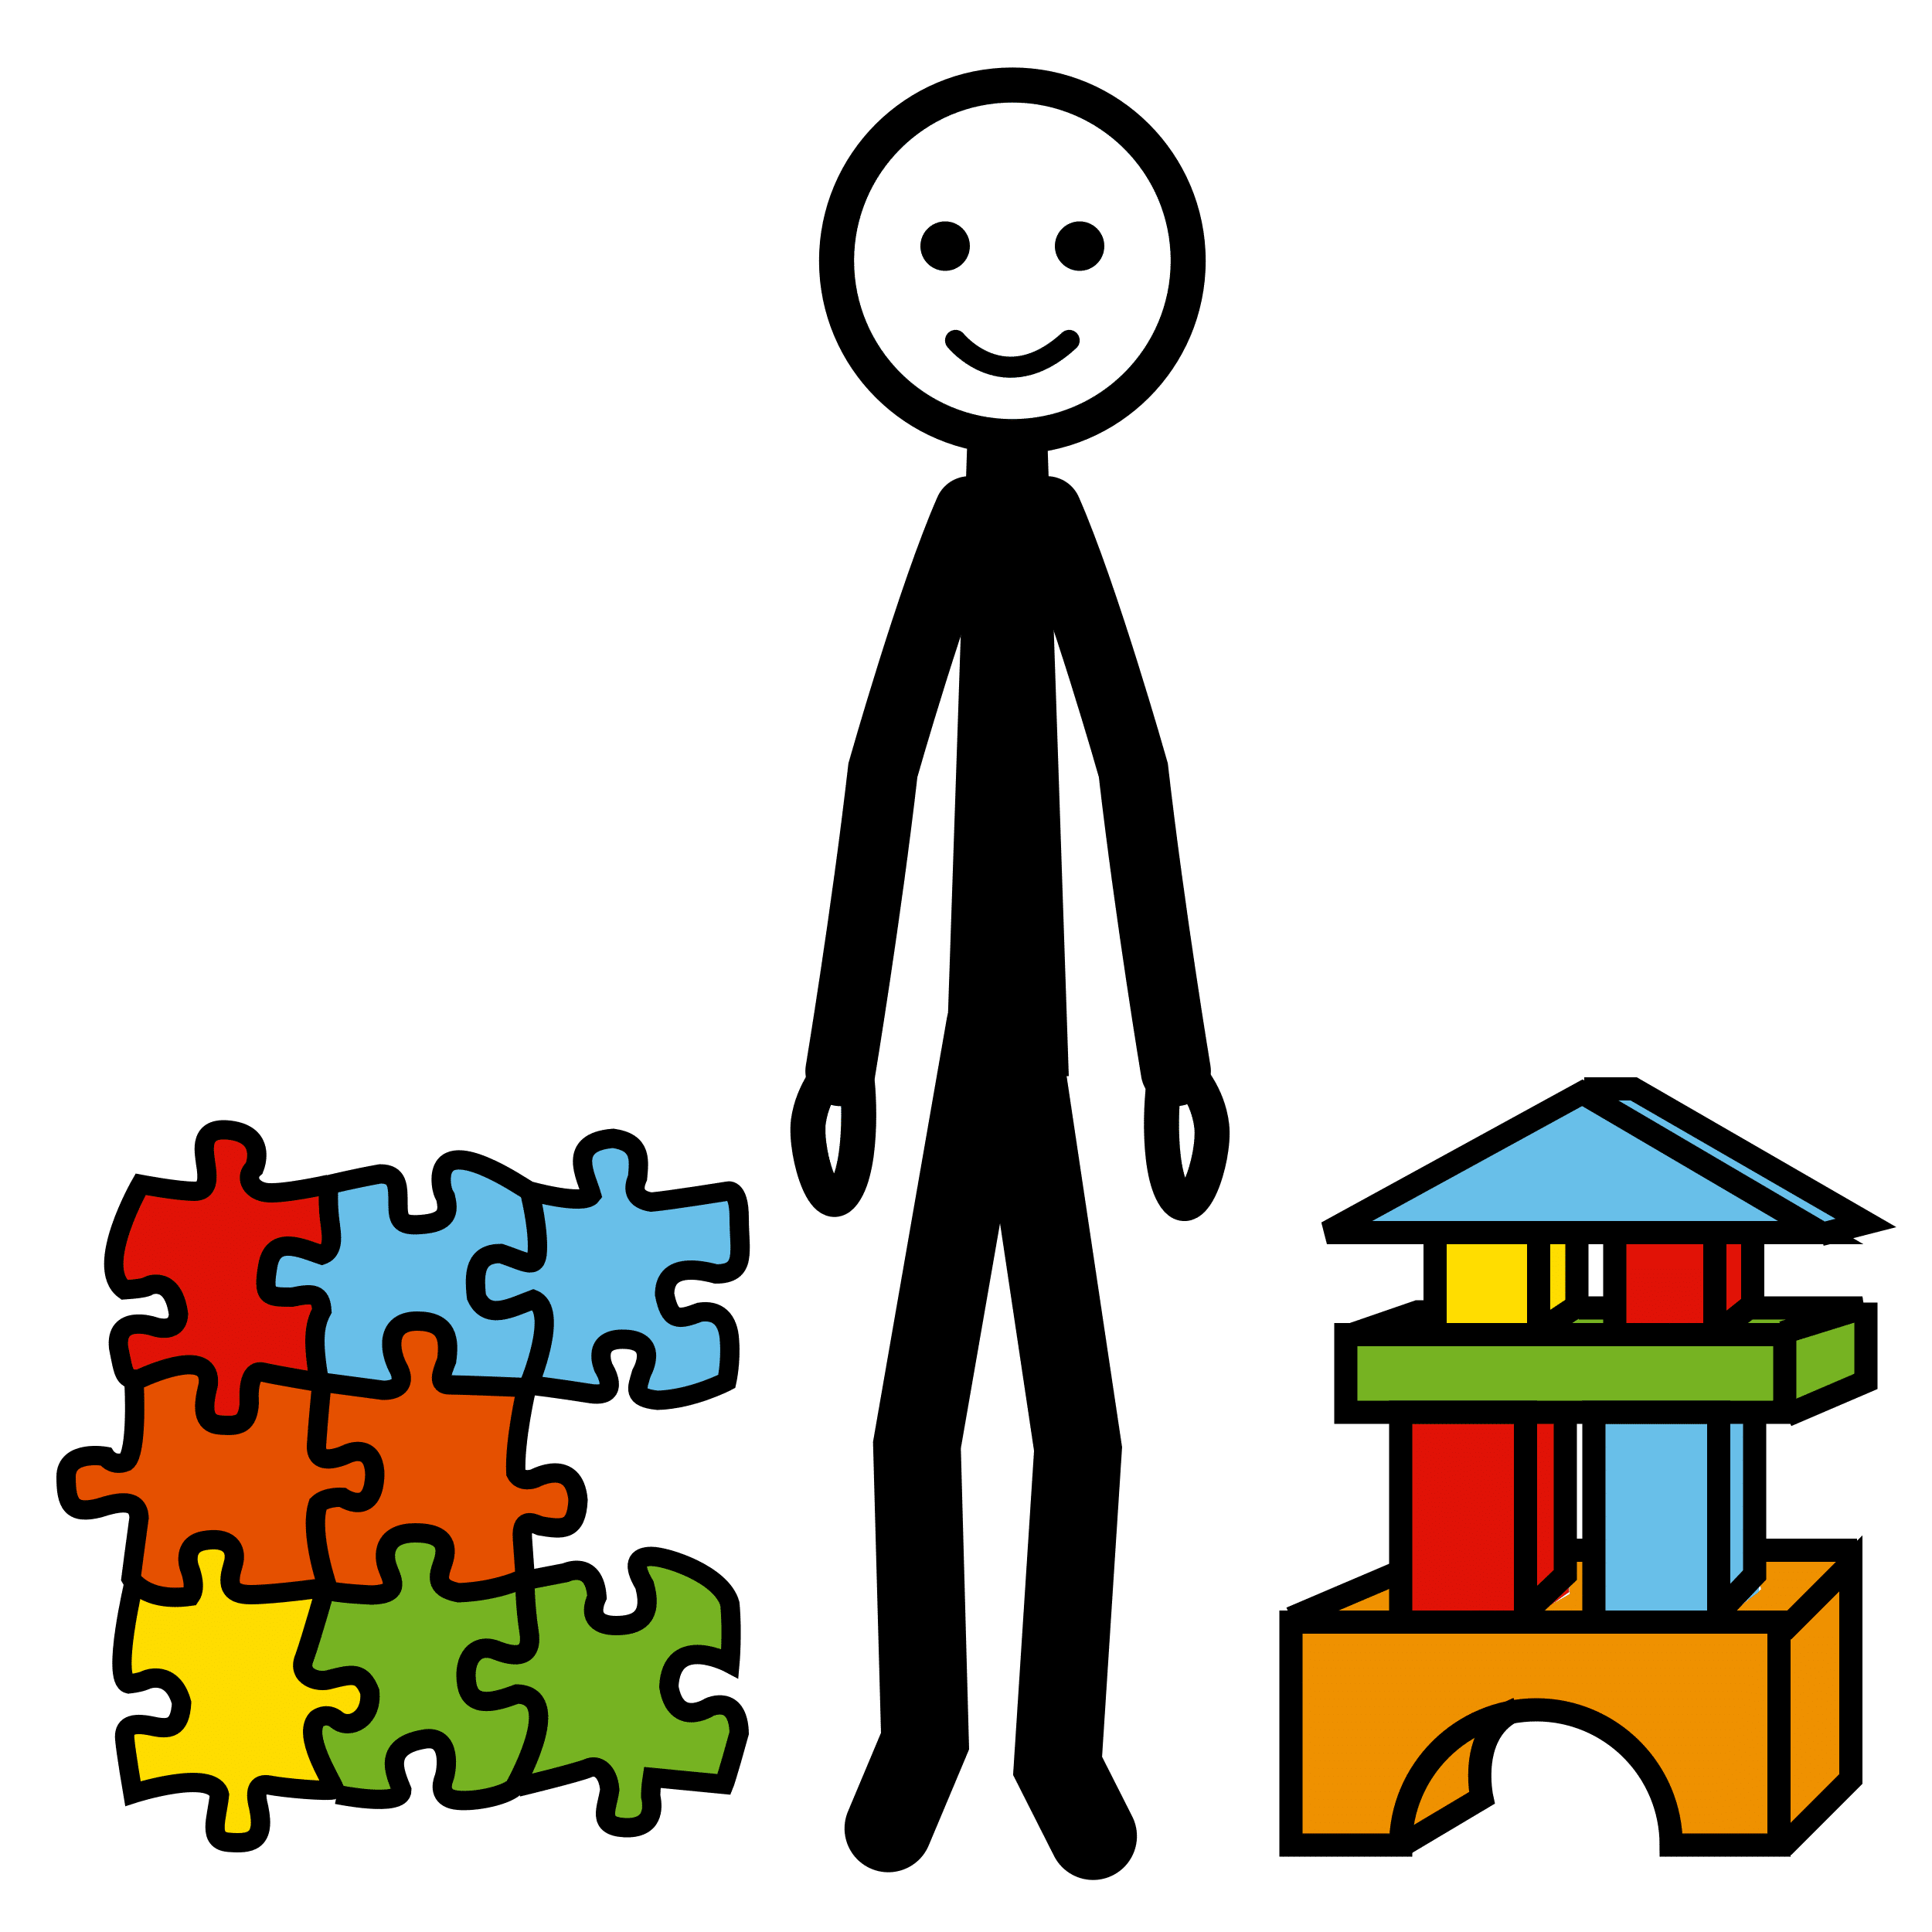

Pictogram ID for 'football': 16743


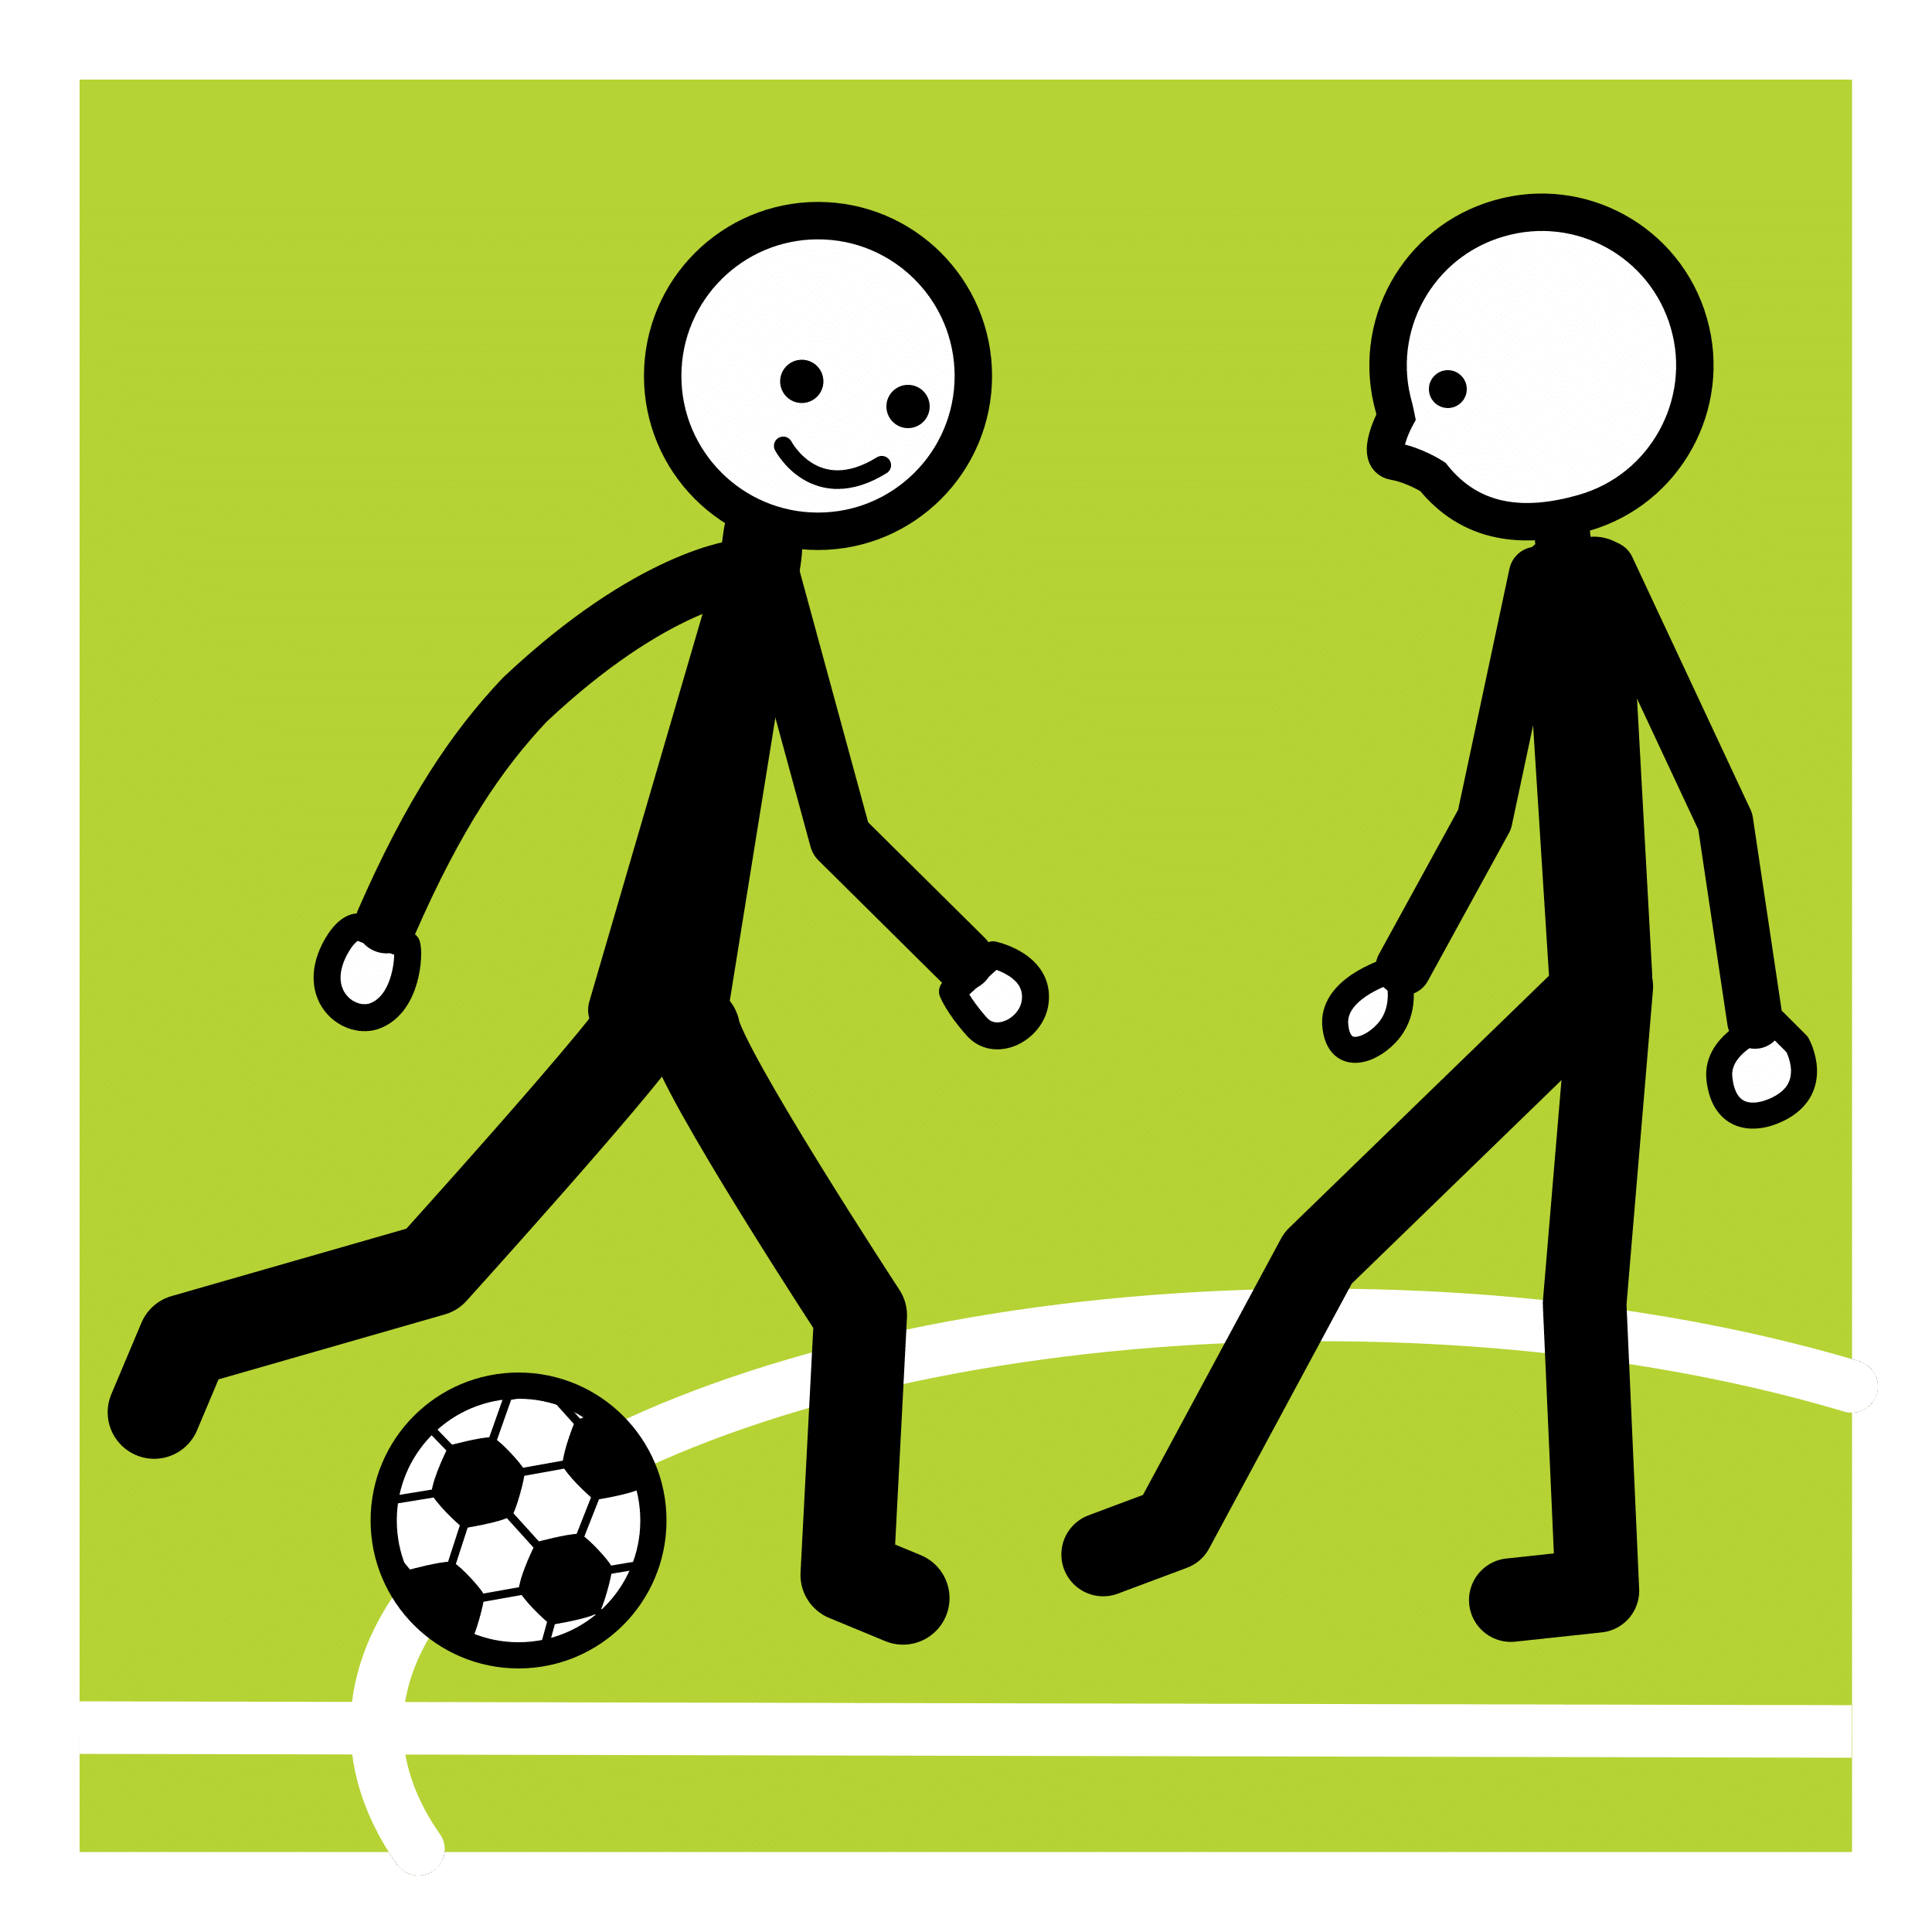

In [27]:

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.corpus import words
import string

import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Download necessary resources
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')    # WordNet for synonyms
nltk.download('words')      # English words corpus

# Load the set of valid English words
valid_words = set(words.words())

# To get a list of appropriate synonyms from WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            # Ensure synonym is a valid English word and isn't an abbreviation
            if synonym in valid_words and len(synonym) >= 4:
                synonyms.add(synonym)
    return synonyms

# To check if word is complex
def is_complex(word):
    stop_words = set(stopwords.words('english'))
    # Modified to mark words longer than 5 characters as complex
    return len(word) > 5 and word.lower() not in stop_words

# Function to simplify text
def lexical_simplification(text):
    tokens = text.split()  
    simplified_tokens = []
    
    for token in tokens:
        # Skip punctuation
        if token in string.punctuation:
            simplified_tokens.append(token)
            continue
        
        # Check if word is complex
        if is_complex(token):
            synonyms = get_synonyms(token)
            if synonyms:
                # Select synonym that is similar in length or slightly shorter, avoiding abbreviations
                simplified_word = min(synonyms, key=len, default=token)
                simplified_tokens.append(simplified_word)
            else:
                simplified_tokens.append(token)  # Keep original if  there is no good synonym
        else:
            simplified_tokens.append(token)  # Not complex, keep original

    return ' '.join(simplified_tokens)


def get_pictogram_id_for_word(word):
    url = f"https://api.arasaac.org/v1/pictograms/en/search/{word}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 0:
            return data[0]["_id"]
    return None

def display_pictogram_image(pictogram_id):
    img_url = f"https://static.arasaac.org/pictograms/{pictogram_id}/{pictogram_id}_2500.png"
    response = requests.get(img_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        # img.show() 
        display(img) 

def process_sentence(sentence):
    words = sentence.split() 
    for word in words:
        pictogram_id = get_pictogram_id_for_word(word)
        if pictogram_id:
            print(f"Pictogram ID for '{word}': {pictogram_id}")
            display_pictogram_image(pictogram_id)

# Example usage
text = "I love to play football"
simplified_text = lexical_simplification(text)
print("Original text:", text)
print("Simplified text:", simplified_text)
process_sentence(simplified_text)
